In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import tee
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

In [2]:
news_df = pd.read_csv('https://github.com/jefrine/ML-News-Popularity/blob/main/OnlineNewsPopularity/OnlineNewsPopularity.csv?raw=true')
news_df.columns = news_df.columns.str.replace(' ', '')

In [3]:
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
news_df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [5]:
news_df.drop("url",axis=1,inplace=True)
news_df['popularity']=pd.cut(news_df['shares'], bins=[0, 2000,np.inf],labels= [0,1]).astype(int)

In [6]:
class LogisticRegression:
    """Class that performs Logistic Regression:
    ---------------
    Parameters:
    X-features
    y-target variable
    learningRate-0.000001
    tolerance-0.0001
    
    """
    
    def __init__(self, learningRate,tolerance, maxIteration=50000):
        
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        
    def normalize(self,X):
        
        '''function to scale the train data'''
        mean=np.mean(X)
        std=np.std(X)
        X_norm=(X-mean)/std
        X_norm=self.addX0(X_norm)
        
        return X_norm,mean,std
    
    def normalizeTestData(self,X_test,train_mean,train_std):
        
        '''function to scale the test data'''
        X_norm=(X_test-train_mean)/train_std
        X_norm=self.addX0(X_norm)
        
        return X_norm
        
    
    def addX0(self,X):
        
        '''function to add bias to the dataset'''
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    
    
    def sigmoid(self,z):
        
        '''function for calculating the probability of belonging to a particular class'''

        sig=1/(1+np.exp(-z))
        return sig
    
    def costFunction(self,X,y):
        
        '''function for returning the cost of the model'''
        
#         #approach 1
        
        pred_=np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w))) - X.dot(self.w).dot(y) #negative log-likelihood
        cost=pred_.sum()
        
        #approach 2
#         sig=self.sigmoid(X.dot(self.w))
#         pred_= y * np.log(sig) + (1-y) * np.log(1-sig)
#         cost= pred_.sum()
        
        return cost
    
    def gradient(self,X,y):
        
        '''function for calculationg the gradient'''
        
        sig=self.sigmoid(X.dot(self.w))
        if self.test == 0:
          print("ssss",(sig-y).shape,X.shape,sig.shape,y.shape,"-----------")
 #         aa = sig.sub(y)
          print("wtf",sig.shape,y.shape,"-----------")
          self.test = 1
        grad=(sig-y).dot(X)
        return grad
    
    def gradientDescent (self,X,y):
        
        '''function which runs the gradient descent algorithm for logistic regression'''
        
        costSequence=[]
        lastCost=float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            if self.test == 0:
              print("aaaa",self.w.shape,"-------")
            self.w=self.w-self.learningRate*self.gradient(X,y)
            
            currentCost = self.costFunction(X,y)
            diff = lastCost-currentCost
            
            lastCost=currentCost
            costSequence.append(currentCost)
            
            if abs(diff) < self.tolerance:
                print("The Model Stopped - No Further Improvement")
                break
                
        self.plotCost(costSequence)
        
        return
        
    def plotCost(self,costSequence):
        
        '''function to plot the cost of the model'''
        
        s=np.array(costSequence)
        t=np.arange(s.size)
        
        fig,ax=plt.subplots()
        ax.plot(t,s)
        
        ax.set(xlabel='iterations',ylabel='cost',title='cost trend')
        ax.grid()
        
        plt.legend(bbox_to_anchor=(1.05,1),shadow=True)
        plt.show()
        
    def predict(self,X):
        
        '''function to return the predicted classes'''
        
        sig=self.sigmoid(X.dot(self.w))
        
        return np.around(sig)
    
    def evaluate(self,y,y_hat):
        
        '''fucntion to evaluate the performance of the model'''
        
        y=(y==1)
        y_hat=(y_hat == 1)
        
        accuracy= ( y == y_hat).sum()/y.size
        precision=(y & y_hat).sum() /y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        f1score=2*(precision*recall)/(precision+recall)
        
        return accuracy,precision,recall,f1score
    
    def runModel(self,X_train, X_test, y_train, y_test):
        
        '''function to run the model'''
        
        self.test = 0
        self.X_train=X_train
        self.X_test=X_test
        self.y_train= y_train
        self.y_test=y_test

#        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,stratify=self.y,test_size=0.2,random_state=0)
#        self.X_train,self.mean,self.std=self.normalize(self.X_train)
#        self.X_test=self.normalizeTestData(self.X_test,self.mean,self.std)
        
        self.w = np.ones(self.X_train.shape[1],dtype=np.float64)*0
        self.gradientDescent(self.X_train,self.y_train)
        
       
        
        y_hat_train = self.predict(self.X_train)
        accuracy,precision,recall,f1score=self.evaluate(self.y_train,y_hat_train)
        print('This is for y_train')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)
        
        y_hat_test = self.predict(self.X_test)
        accuracy,precision,recall,f1score=self.evaluate(self.y_test,y_hat_test)
        print('This is for y_test')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)

In [7]:
lr=LogisticRegression(tolerance=0.0001,learningRate=0.000001)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(news_df.drop(['shares', 'popularity'],axis = 1), news_df['popularity'],
                                                            test_size=0.3,
                                                            random_state=42)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83541ff790>,
      dtype=object)

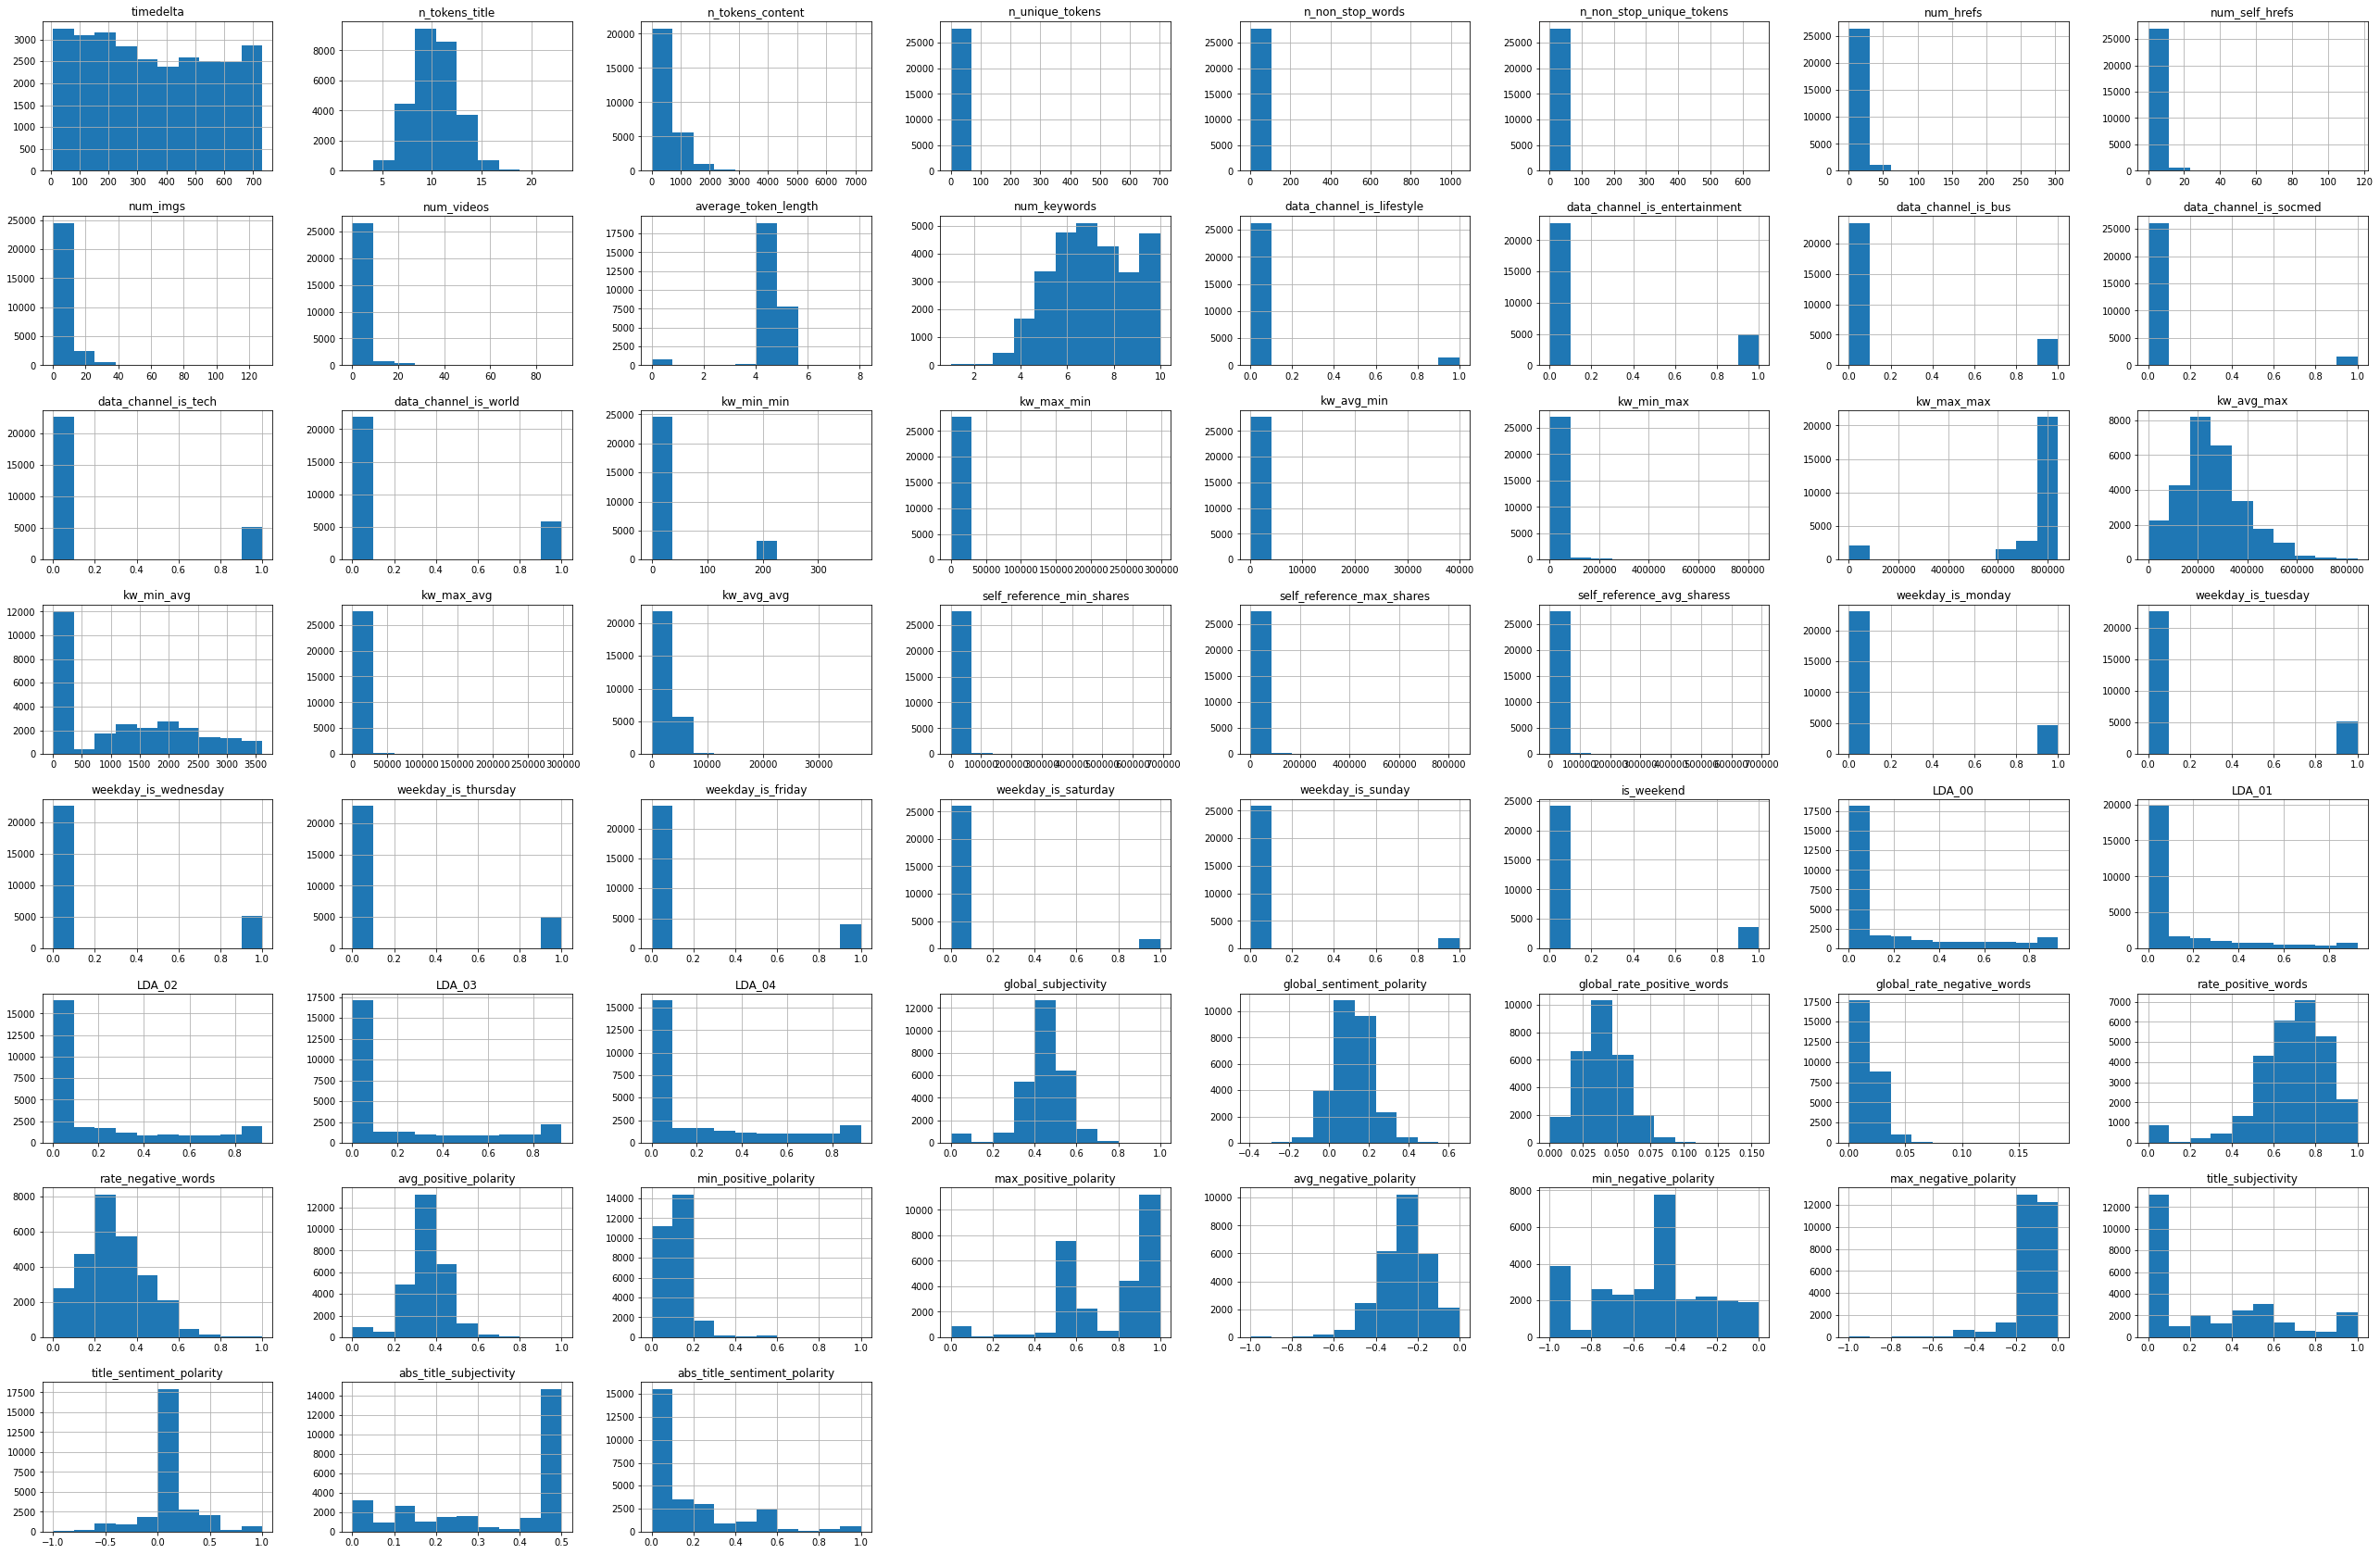

In [9]:
X_train.hist( figsize=(45, 30))

  0%|          | 0/50000 [00:00<?, ?it/s]

aaaa (59,) -------
ssss (27750,) (27750, 59) (27750,) (27750,) -----------
wtf (27750,) (27750,) -----------


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
No handles with labels found to put in legend.


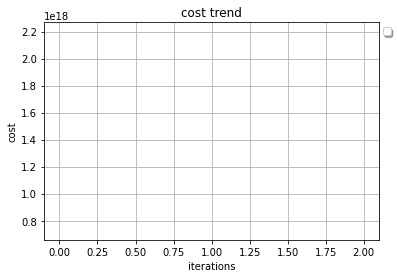

This is for y_train
Training Accuracy: 0.3480720720720721
Training Precision: 0.3451970219720356
Training Recall: 0.9936232490068995
Training f1score: 0.5123851109134525
This is for y_test
Training Accuracy: 0.34530015133680847
Training Precision: 0.34150479260327427
Training Recall: 0.9940740740740741
Training f1score: 0.5083654271102974


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
lr.runModel(X_train, X_test, y_train, y_test)

In [11]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        covariance_matrix = np.cov(X, rowvar=0)
        eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

        sorted_indexes = np.argsort(-eigen_values)
        eigen_values = eigen_values[sorted_indexes]
        eigen_vectors = eigen_vectors.T[sorted_indexes]

        # Choose principal components
        self.principal_components = eigen_vectors[:self.n_components, :]

        # Explained variance
        self.explained_variance = [
            (i / np.sum(eigen_values)) * 100 for i in eigen_values[:self.n_components]]

        # Cumulative explained variance
        self.total_explained_variance = np.cumsum(self.explained_variance)

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.principal_components.T)


In [12]:
pca = PCA(n_components=11)

In [13]:
pca.fit(X_train)

In [14]:
X_train_pca = pca.transform(X_train)

In [15]:
X_test_pca = pca.transform(X_test)

In [16]:
#X_train_pca = pd.DataFrame(X_train_pca)
#X_test_pca = pd.DataFrame(X_test_pca)

In [17]:
pca.explained_variance

[76.28797243721182,
 16.400924588720287,
 3.4804469535393547,
 3.250485171976615,
 0.4732380472810757,
 0.06302576818593525,
 0.02958285488319577,
 0.01186031093430749,
 0.0017051013870246622,
 0.00035990990816237045,
 0.0002966253492928608]

In [18]:
lr_pca=LogisticRegression(tolerance=0.0001,learningRate=0.00001)

  0%|          | 0/50000 [00:00<?, ?it/s]

aaaa (11,) -------
ssss (27750,) (27750, 11) (27750,) (27750,) -----------
wtf (27750,) (27750,) -----------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in exp
No handles with labels found to put in legend.


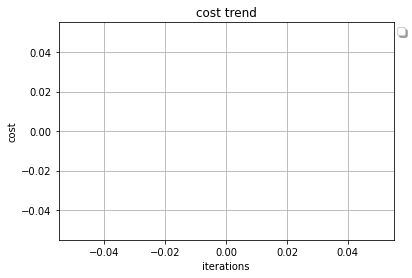

This is for y_train
Training Accuracy: 0.44763963963963965
Training Precision: 0.3541413527744026
Training Recall: 0.7312356261760401
Training f1score: 0.4771812538372332
This is for y_test
Training Accuracy: 0.45703716159408103
Training Precision: 0.35573927630002394
Training Recall: 0.7330864197530864
Training f1score: 0.47902549209422385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in exp


In [19]:
lr_pca.runModel(X_train_pca, X_test_pca, y_train, y_test)

In [19]:
class SoftMarginSVM:
    
    """Class that performs Soft margin SVM:
    ---------------
    Parameters:
    X-features
    y-target variable
    alpha-lagrangian multiplier
    w-weights(parameters which are learnt)
    C-regularization term
    
    """
    
    def __init__(self,X,y,C):
        self.alpha = None
        self.w = None
        self.supportVectors = None
        self.X=X
        self.y=y
        self.C = C
        
    def normalize(self,X):
        
        '''function to scale the train data'''
        
        mean=np.mean(X)
        std=np.std(X)
        X_norm=(X-mean)/std
        X_norm=self.addX0(X_norm)
        
        return X_norm,mean,std
    
    def normalizeTestData(self,X_test,train_mean,train_std):
        
        '''function to scale the test data'''
        
        X_norm=(X_test-train_mean)/train_std
        X_norm=self.addX0(X_norm)
        
        return X_norm
        
    
    def addX0(self,X):
        
        ''' function to add bias to the dataset'''
        
        return np.column_stack([np.ones([X.shape[0],1]),X])
                

                

    def fit(self, X, y):
        
        '''function for fitting the model'''

        N = len(y)

        # Gram matrix of (X,y)
        Xy = X*y[:,np.newaxis] 

        GramXy = np.matmul(Xy,Xy.T) 
    
        def Ld0(G, alpha): 
            
            '''function to calculate the dual form of SVM'''
            obj_fn = alpha.sum() - 0.5*alpha.dot(alpha.dot(G))

            return obj_fn
        

            # Derivative of Lagrangian Function
        def partialDerivationLd0(G, alpha):
            
            '''function to calculate derivative of lagrangian function'''
            
            par_der = np.ones_like(alpha) - alpha.dot(G)
            return par_der

        alpha = np.ones(N)

        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C * np.ones(N)))

        constraints = ({'type': 'eq', 'fun':lambda a: np.dot(a,y), 'jac': lambda a: y },
                    {'type': 'ineq', 'fun':lambda a: b - np.dot(A, a), 'jac': lambda a: -A}) 

        optRes = optimize.minimize(fun = lambda a: -Ld0(GramXy, a),
                                x0 = alpha,
                                method = 'SLSQP',
                                jac = lambda a: - partialDerivationLd0(GramXy, a),
                                constraints = constraints)
        
        self.alpha = optRes.x


        self.w =  np.sum(( self.alpha[:, np.newaxis] * Xy), axis = 0)

        epsilon = 1e-4
        self.supportVectors = X[ self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]


        self.b1 = self.supportLabels[0] - np.matmul(self.supportVectors[0].T, self.w)
        
        b = []
        for i in tqdm(range(len(self.supportLabels))):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append( b_i )
        
        self.b2 = sum(b)/len(b)
        
        self.intercept = self.b2
        
    def predict(self, X):
        
        '''function to return the predicted classes'''
    
        return 2*(np.matmul(X, self.w) + self.intercept > 0) - 1
    
    def evaluate(self,y,y_hat):
        
        '''function to evaluate the performance of the model'''
        
        y=(y==1)
        y_hat=(y_hat == 1)
        
        accuracy= ( y == y_hat).sum()/y.size
        precision=(y & y_hat).sum() /y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        f1score=2*(precision*recall)/(precision+recall)
        
        return accuracy,precision,recall,f1score
    
    def runModel(self):
        
        '''function to run the model'''
        
        #solving class imbalance using SMOTE
        
        smote=SMOTETomek(random_state=42)
        self.X,self.y= smote.fit_resample(self.X,self.y)
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,test_size=0.2,random_state=0)
        
        #normalizing the data
        self.X_train,self.mean,self.std=self.normalize(self.X_train)
        self.X_test=self.normalizeTestData(self.X_test,self.mean,self.std)
        
        self.fit(self.X_train,self.y_train)
        
        y_hat_train = self.predict(self.X_train)
        print('This is y_hat_train:', y_hat_train)
        accuracy,precision,recall,f1score=self.evaluate(self.y_train,y_hat_train)
        print('This is for y_train')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)
        
        y_hat_test = self.predict(self.X_test)
        print('This is y_hat_test:', y_hat_test)
        accuracy,precision,recall,f1score=self.evaluate(self.y_test,y_hat_test)
        print('This is for y_test')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)